In [87]:
import pandas as pd
from collections import defaultdict 
import os, time, json


finance_data = pd.read_csv("./FactEnhancedCompanyFinancialHighlights_editted.csv")
finance_data.head

/Users/junchernwu/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (1,31,35,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<bound method NDFrame.head of         DimEntityBasicProfileID FactEnhancedCompanyFinancialHighlightsID  \
0                       2514372                                   457758   
1                       2514372                                   520754   
2                       2514372                                   570557   
3                       2514372                                   350065   
4                       2514372                                   229906   
...                         ...                                      ...   
991302                  7705115                                  1842863   
991303                  7707444                                  1842867   
991304                  7707518                                  1842868   
991305                  7707524                                  1842869   
991306                  7708158                                  1842873   

        CompanyProfileID CompanyRegistrationNumber  \
0  

In [88]:
dimssic_data = pd.read_csv("./DimCompanyCapital.csv")
dimssic_data.head

<bound method NDFrame.head of         DimEntityBasicProfileID  DimCompanyCapitalID  CompanyProfileID  \
0                       2514372                11365           2514372   
1                       2514372                11366           2514372   
2                       2514372                11367           2514372   
3                       2514373                11368           2514373   
4                       2514373                11369           2514373   
...                         ...                  ...               ...   
776806                  7708169              1641197           7708169   
776807                  7708169              1641198           7708169   
776808                  7708172               128931           7708172   
776809                  7708172               128932           7708172   
776810                  7708172               128933           7708172   

       CompanyRegistrationNumber CapitalCurrencyCode CapitalShareTypeCode  \
0   

In [160]:
dimssic_data.isnull().sum()

DimEntityBasicProfileID                   0
DimCompanyCapitalID                       0
CompanyProfileID                          0
CompanyRegistrationNumber                 0
CapitalCurrencyCode                       0
CapitalShareTypeCode                      0
CapitalConversionRate                     0
CapitalShareAllotedAmount               190
IssuedCapitalAmount                     210
PaidupCapitalAmount                     211
CreatedDateTime                           0
UpdatedDateTime                       75544
IsActive                                  0
EffectiveDateFrom                         0
EffectiveDateTo                      773350
ExecutionID                          776811
EDHLastModifiedDate                       0
JobControlTransformationDetailsId         0
Status                                    0
dtype: int64

In [161]:
df = finance_data[['DimEntityBasicProfileID', 'EFHRevenue', 'CompanyTotalAsset', 'CompanyTotalLiability', 'CompanyTotalEquity'
                  , 'CompanyAccumulatedProfitLoss', 'CreatedDateTime']]

df = df[df.CompanyAccumulatedProfitLoss != 0]
df = df.sort_values('CreatedDateTime').drop_duplicates('DimEntityBasicProfileID',keep='last')
df= df.dropna(thresh=7)
df2.index

Int64Index([2514372, 2514372, 2514372, 2514373, 2514373, 2514373, 2514383,
            2514385, 2514385, 2514385,
            ...
            7708166, 7708166, 7708166, 7708169, 7708169, 7708169, 7708169,
            7708172, 7708172, 7708172],
           dtype='int64', name='DimEntityBasicProfileID', length=776811)

In [145]:
df2 = dimssic_data[['DimEntityBasicProfileID', 'PaidupCapitalAmount']]

df1 = df.set_index("DimEntityBasicProfileID")
df2 = df2.set_index("DimEntityBasicProfileID")
df3 = df1.join(df2, how='inner')
df3.columns

KeyError: "None of ['DimEntityBasicProfileID'] are in the columns"

In [121]:
df3 = df3.dropna()

In [122]:
df3 = df3.drop("CreatedDateTime", axis=1)


In [123]:
df3.isnull().sum()

EFHRevenue                      0
CompanyTotalAsset               0
CompanyTotalLiability           0
CompanyTotalEquity              0
CompanyAccumulatedProfitLoss    0
PaidupCapitalAmount             0
dtype: int64

In [150]:
import pandas as pd
from sklearn import preprocessing
df4 = df3[["CompanyTotalAsset", "CompanyTotalEquity", "PaidupCapitalAmount"]]
x = df4.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)

dataset1_normalized = pd.DataFrame(x_scaled)
dataset1_normalized.columns = ["CompanyTotalAsset", "CompanyTotalEquity", "PaidupCapitalAmount"]
dataset1_normalized['index'] = df4.index.tolist()
dataset1_normalized = dataset1_normalized.set_index("index")


In [156]:
dataset1_normalized.isnull().sum()
dataset1_normalized = dataset1_normalized.dropna()
dataset1_normalized.columns

Index(['CompanyTotalAsset', 'CompanyTotalEquity', 'PaidupCapitalAmount'], dtype='object')

In [157]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(dataset1_normalized))
training_data = dataset1_normalized[(z < 3).all(axis=1)]


In [158]:
training_data.shape

(206914, 3)

In [159]:
training_data.isnull().sum()

CompanyTotalAsset      0
CompanyTotalEquity     0
PaidupCapitalAmount    0
dtype: int64

In [56]:
# profileID = df.loc[:, 'DimEntityBasicProfileID']
# profileID

846114    3235881
846116    3236179
846113    3235826
894982    4921991
894983    4922002
           ...   
985124    7588234
985125    7588248
985126    7588275
985128    7588304
985129    7588318
Name: DimEntityBasicProfileID, Length: 227001, dtype: int64

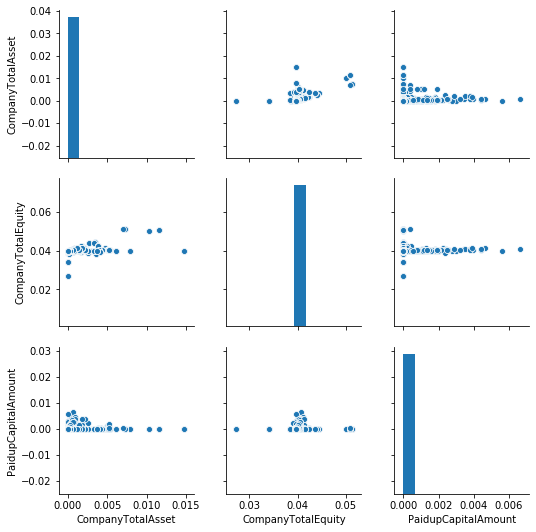

In [57]:
# Seaborn visualization library
import seaborn as sns
# Create the default pairplot
sns.pairplot(training_data)

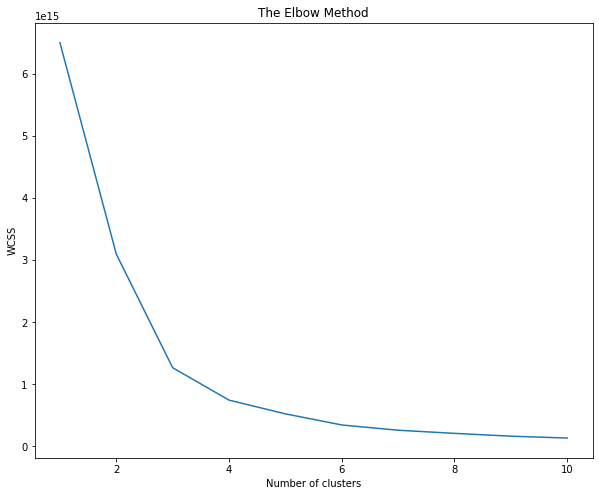

In [134]:
from matplotlib import pyplot as plt
# find the appropriate cluster number
plt.figure(figsize=(10, 8))
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(training_data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [58]:
# training_data = training_data.drop(['cluster'], axis=1)
training_data

,CompanyTotalAsset,CompanyTotalEquity,PaidupCapitalAmount
0,0.000059,0.039740,4.632594e-07
1,0.000059,0.039740,0.000000e+00
2,0.000059,0.039740,0.000000e+00
3,0.000062,0.039727,1.230692e-05
4,0.000062,0.039727,0.000000e+00
...,...,...,...
207008,0.000038,0.039704,0.000000e+00
207009,0.000038,0.039704,0.000000e+00
207010,0.000043,0.039713,4.382159e-07
207011,0.000043,0.039713,0.000000e+00


In [69]:
# Fitting K-Means to the dataset

kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(training_data)
y_kmeans
#beginning of  the cluster numbering with 1 instead of 0
y_kmeans1=y_kmeans
y_kmeans1=y_kmeans+1
# # Adding cluster to the Dataset1
training_data['cluster'] = y_kmeans1
#Mean of clusters
kmeans_mean_cluster = pd.DataFrame(round(training_data.groupby('cluster').mean(),1))
kmeans_mean_cluster

/Users/junchernwu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,CompanyTotalAsset,CompanyTotalEquity,PaidupCapitalAmount
cluster,,,
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.1,0.0


In [70]:
training_data['cluster'].describe

<bound method NDFrame.describe of 0         1
1         1
2         1
3         1
4         1
         ..
207008    1
207009    1
207010    1
207011    1
207012    1
Name: cluster, Length: 206914, dtype: int32>

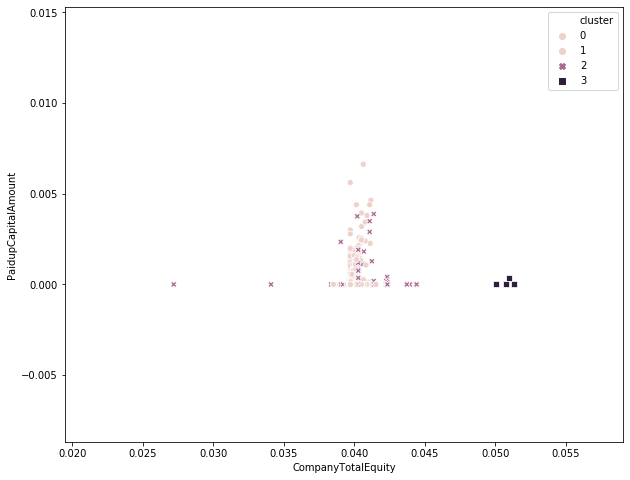

In [72]:
import seaborn as sns
plt.figure(figsize=(10, 8))
ax = sns.scatterplot(x = "CompanyTotalEquity", y="PaidupCapitalAmount",
                     hue = "cluster",  style = 'cluster', data=training_data)

In [64]:
generated_data_filepath = './dataGenerated'
cluster1_filepath = generated_data_filepath + '/cluster1.csv'
training_data[training_data['cluster']==1].describe()
# dataset1_standardized[dataset1_standardized['cluster']==1].to_csv(cluster1_filepath, index = False)

,CompanyTotalAsset,CompanyTotalEquity,PaidupCapitalAmount,cluster
count,206775.000000,206775.000000,2.067750e+05,206775.0
mean,0.000042,0.039707,1.681170e-06,1.0
std,0.000038,0.000033,4.456846e-05,0.0
min,0.000000,0.038509,0.000000e+00,1.0
25%,0.000037,0.039704,0.000000e+00,1.0
50%,0.000038,0.039704,0.000000e+00,1.0
75%,0.000038,0.039704,2.895371e-09,1.0
max,0.001633,0.041522,6.624549e-03,1.0


In [65]:
cluster2_filepath = generated_data_filepath + '/cluster2.csv'
training_data[training_data['cluster']==2].describe()
# dataset1_standardized[dataset1_standardized['cluster']==2].to_csv(cluster2_filepath, index = False)

,CompanyTotalAsset,CompanyTotalEquity,PaidupCapitalAmount,cluster
count,12.000000,12.000000,1.200000e+01,12.0
mean,0.008824,0.050942,3.062351e-05,2.0
std,0.002026,0.000479,1.036319e-04,0.0
min,0.007021,0.050064,0.000000e+00,2.0
25%,0.007259,0.050759,0.000000e+00,2.0
50%,0.007259,0.051139,0.000000e+00,2.0
75%,0.010593,0.051325,6.786034e-07,2.0
max,0.011598,0.051325,3.596603e-04,2.0


In [66]:
cluster3_filepath = generated_data_filepath + '/cluster3.csv'
training_data[training_data['cluster']==3].describe()
# dataset1_standardized[dataset1_standardized['cluster']==3].to_csv(cluster3_filepath, index = False)

,CompanyTotalAsset,CompanyTotalEquity,PaidupCapitalAmount,cluster
count,119.000000,119.000000,1.190000e+02,119.0
mean,0.003639,0.040653,2.287702e-04,3.0
std,0.002297,0.001282,7.271813e-04,0.0
min,0.001633,0.038342,0.000000e+00,3.0
25%,0.002105,0.039741,0.000000e+00,3.0
50%,0.003361,0.040271,0.000000e+00,3.0
75%,0.004251,0.041238,1.447686e-08,3.0
max,0.014811,0.044404,3.885435e-03,3.0


In [67]:
cluster4_filepath = generated_data_filepath + '/cluster4.csv'
training_data[training_data['cluster']==4].describe()
training_data[training_data['cluster']==4].to_csv(cluster4_filepath, index = False)
training_data[training_data['cluster']==4].describe()


,CompanyTotalAsset,CompanyTotalEquity,PaidupCapitalAmount,cluster
count,8.000000,8.000000,8.000000e+00,8.0
mean,0.000044,0.031501,1.809607e-13,4.0
std,0.000005,0.003570,3.350741e-13,0.0
min,0.000037,0.027190,0.000000e+00,4.0
25%,0.000037,0.027190,0.000000e+00,4.0
50%,0.000047,0.034088,0.000000e+00,4.0
75%,0.000047,0.034088,1.809607e-13,4.0
max,0.000047,0.034088,7.238428e-13,4.0


In [ ]:
# dataset1_standardized['ID'] = list(profileID) ##because list doesnt care abt index unlike dataframes

In [435]:
dataset1_standardized = dataset1_standardized[dataset1_standardized.cluster == 1]
dataset1_standardized

,EFHRevenue,CompanyTotalAsset,TotalLiability,TotalEquity,AccumulatedProfitLoss,cluster
0,-0.006374,-0.003940,-0.002869,-0.016204,-0.001211,1
1,-0.006375,-0.003940,-0.002869,-0.016204,-0.001210,1
2,-0.006375,-0.003940,-0.002869,-0.016204,-0.001211,1
3,-0.006375,-0.003940,-0.002869,-0.016205,-0.001212,1
4,-0.006375,-0.003898,-0.002820,-0.016304,-0.001409,1
...,...,...,...,...,...,...
226996,-0.006350,-0.003939,-0.002866,-0.016231,-0.001265,1
226997,-0.006357,-0.003926,-0.002865,-0.016035,-0.000884,1
226998,-0.006315,-0.003885,-0.002844,-0.015730,-0.000466,1
226999,-0.006292,-0.003936,-0.002868,-0.016146,-0.001128,1


In [110]:
dataset1_standardized = dataset1_standardized.drop('cluster', axis = 1)
dataset1_standardized

NameError: name 'dataset1_standardized' is not defined

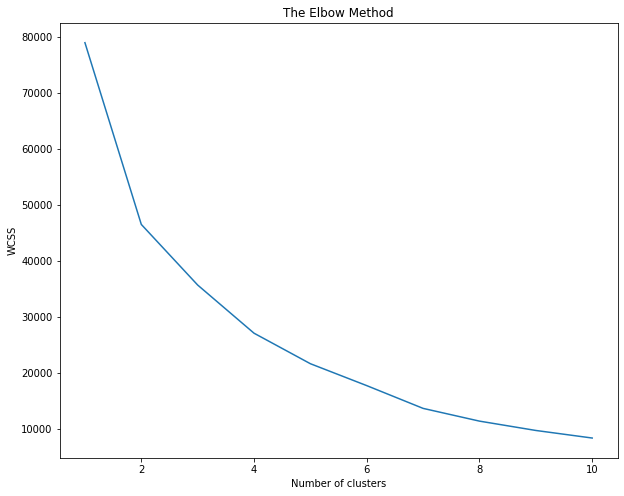

In [439]:
# find the appropriate cluster number
plt.figure(figsize=(10, 8))
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(dataset1_standardized)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [487]:
# Fitting K-Means to the dataset

kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(dataset1_standardized)
#beginning of  the cluster numbering with 1 instead of 0
y_kmeans1=y_kmeans
y_kmeans1=y_kmeans+1
# New Dataframe called cluster
cluster = pd.DataFrame(y_kmeans1)
# Adding cluster to the Dataset1
dataset1_standardized['cluster'] = y_kmeans1
#Mean of clusters
kmeans_mean_cluster = pd.DataFrame(round(dataset1_standardized.groupby('cluster').mean(),1))
kmeans_mean_cluster

,EFHRevenue,CompanyTotalAsset,TotalLiability,TotalEquity,AccumulatedProfitLoss
cluster,,,,,
1,-0.0,-0.0,-0.0,-0.0,-0.0
2,0.4,1.7,0.1,24.9,1.9
3,10.8,2.3,0.7,24.8,42.8
4,11.0,2.0,1.6,-21.9,-39.3


In [488]:
dataset1_standardized.isnull().sum()

EFHRevenue               0
CompanyTotalAsset        0
TotalLiability           0
TotalEquity              0
AccumulatedProfitLoss    0
cluster                  0
dtype: int64

In [486]:
dataset1_standardized = dataset1_standardized.drop("cluster", axis = 1)

In [489]:
dataset1_standardized['cluster'].describe

<bound method NDFrame.describe of 0         1
1         1
2         1
3         1
4         1
         ..
226996    1
226997    1
226998    1
226999    1
227000    1
Name: cluster, Length: 226979, dtype: int32>

In [490]:
dataset1_standardized[dataset1_standardized['cluster']==1].describe()

,EFHRevenue,CompanyTotalAsset,TotalLiability,TotalEquity,AccumulatedProfitLoss,cluster
count,226931.000000,226931.000000,226931.000000,226931.000000,226931.000000,226931.0
mean,-0.004489,-0.003127,-0.002325,-0.012005,-0.000618,1.0
std,0.050856,0.048446,0.046211,0.139928,0.135632,0.0
min,-0.096765,-0.004669,-0.003667,-8.393164,-17.645717,1.0
25%,-0.006375,-0.003940,-0.002869,-0.016208,-0.001234,1.0
50%,-0.006370,-0.003938,-0.002867,-0.016204,-0.001211,1.0
75%,-0.006313,-0.003923,-0.002860,-0.016148,-0.001180,1.0
max,11.650226,11.064153,11.086335,12.271064,19.681140,1.0


In [491]:
dataset1_standardized[dataset1_standardized['cluster']==2].describe()

,EFHRevenue,CompanyTotalAsset,TotalLiability,TotalEquity,AccumulatedProfitLoss,cluster
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.0
mean,0.433881,1.714652,0.108430,24.915230,1.905178,2.0
std,2.677890,0.579733,0.183703,8.592187,8.209443,0.0
min,-14.287531,0.982958,-0.002816,13.723790,-16.788086,2.0
25%,-0.006375,1.198161,-0.001590,16.873826,-0.004354,2.0
50%,0.533927,1.547339,0.031362,22.530806,0.714323,2.0
75%,1.571148,2.147218,0.149317,33.031465,3.399712,2.0
max,2.504900,2.889296,0.888004,41.857580,22.029845,2.0


In [492]:
dataset1_standardized[dataset1_standardized['cluster']==3].describe()

,EFHRevenue,CompanyTotalAsset,TotalLiability,TotalEquity,AccumulatedProfitLoss,cluster
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.0
mean,10.792722,2.330318,0.735031,24.763783,42.824831,3.0
std,24.038393,1.988808,1.066027,16.755085,21.469471,0.0
min,-0.006375,1.031137,-0.002286,14.039971,27.963116,3.0
25%,-0.006375,1.212631,0.012530,15.968144,31.755659,3.0
50%,-0.006375,1.703736,0.221587,17.668017,36.345593,3.0
75%,4.836269,2.272745,1.062455,23.233293,40.935758,3.0
max,68.386795,7.087262,3.017799,63.202939,94.231991,3.0


In [493]:
dataset1_standardized[dataset1_standardized['cluster']==4].describe()

,EFHRevenue,CompanyTotalAsset,TotalLiability,TotalEquity,AccumulatedProfitLoss,cluster
count,4.000000,4.000000,4.000000,4.000000,4.000000,4.0
mean,11.036648,2.011832,1.607739,-21.903491,-39.319855,4.0
std,16.303903,1.089461,1.303787,21.085605,9.559414,0.0
min,-0.006375,1.379257,-0.295137,-51.927510,-47.040497,4.0
25%,-0.006375,1.381644,1.289166,-25.698250,-45.917258,4.0
50%,4.815130,1.516617,2.124483,-16.578836,-42.079945,4.0
75%,15.858153,2.146805,2.443056,-12.784077,-35.482541,4.0
max,34.522707,3.634836,2.477129,-2.528784,-26.079035,4.0


In [497]:
from sklearn.metrics import silhouette_samples, silhouette_score
sil_avg = silhouette_score(dataset1_standardized, cluster)

/Users/junchernwu/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [499]:
(sil_avg) #test the cluster 


0.9992089562782606

In [ ]:
sample_silhouette_values = silhouette_samples(X, cluster)

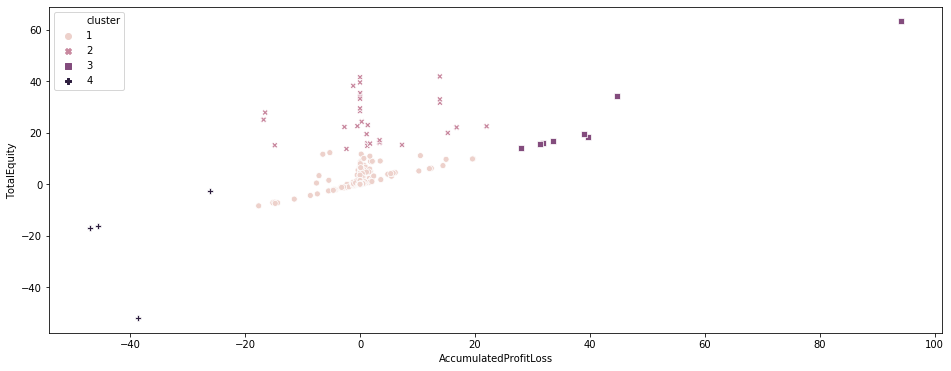

In [503]:
plt.figure(figsize=(16, 6))
ax = sns.scatterplot(x = "AccumulatedProfitLoss", y="TotalEquity",
                     hue = "cluster",  style = 'cluster', data=dataset1_standardized)